<a href="https://colab.research.google.com/github/Sonali-Kotni57/Data-Science-and-Business-analytics-Internship/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-5 Exploratory Data Analysis - Sports**

**IMPORTING THE LIBRARIES** 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [ ]:
deliveries= pd.read_csv("/content/sample_data/deliveries.csv")
matches= pd.read_csv("/content/sample_data/matches.csv")

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

**DATA CLEANING**

In [ ]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Rising Pune Supergiants has a missing 's' in a few entries

In [ ]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [ ]:
type(matches['date'].iloc[0])

str

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])
type(matches['date'].iloc[0])


pandas._libs.tslibs.timestamps.Timestamp

**'TOP 5' EVERYTHING!**

In [ ]:
most_wins = matches[matches['result'] == 'normal']['winner'].value_counts()
most_home_wins = matches[matches['result'] == 'normal'][matches['team1'] == matches['winner']]['team1'].value_counts()
most_matches = matches['team1'].append(matches['team2']).value_counts()
most_runs = deliveries[['batsman','batsman_runs']].groupby('batsman').sum().sort_values('batsman_runs',ascending=False)
umpire_most_matches = matches['umpire1'].append(matches['umpire2']).append(matches['umpire3']).value_counts()
most_player_of_match = matches['player_of_match'].value_counts()

deliveries['dismissal_kind'].unique()
#if dismiss kind is 'run out','retired hurt' or 'obstructing the field', it is not a bwloer's wicket.
dismiss_kind = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
def check_kind(kind):
    if kind in dismiss_kind:
        return kind

most_wickets = deliveries[deliveries['dismissal_kind'].apply(check_kind).notnull()]['bowler'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


**Most Wins**

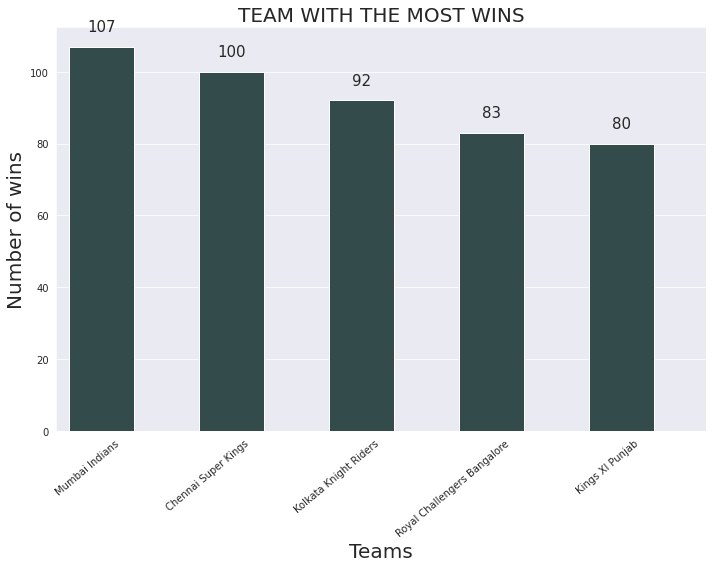

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = most_wins.head().index, y = most_wins.head().values, units = most_wins.head().index, color = 'darkslategrey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Teams').set_size(20)
ax.set_ylabel('Number of wins').set_size(20)
ax.set_title('TEAM WITH THE MOST WINS').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

**Most Home Wins**

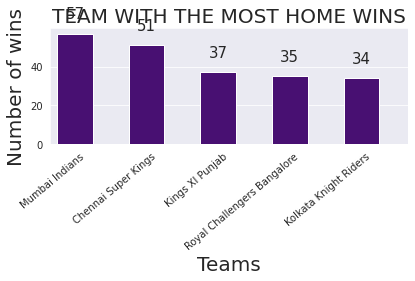

In [ ]:
sns.set_style("darkgrid")
ax = sns.barplot(x = most_home_wins.head().index, y = most_home_wins.head().values, units = most_home_wins.head().index, color='indigo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Teams').set_size(20)
ax.set_ylabel('Number of wins').set_size(20)
ax.set_title('TEAM WITH THE MOST HOME WINS').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

**Most Matches**

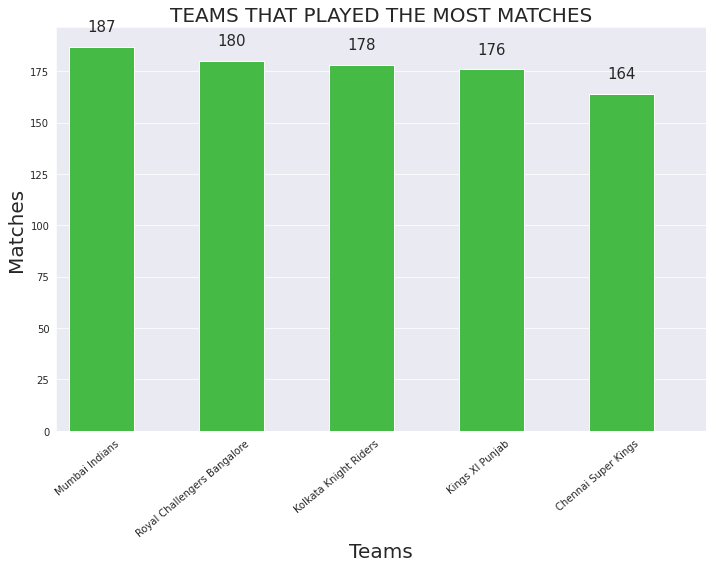

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = most_matches.head().index, y = most_matches.head().values, units = most_matches.head().index, color='limegreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Teams').set_size(20)
ax.set_ylabel('Matches').set_size(20)
ax.set_title('TEAMS THAT PLAYED THE MOST MATCHES').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

**Highest Run Scorers**

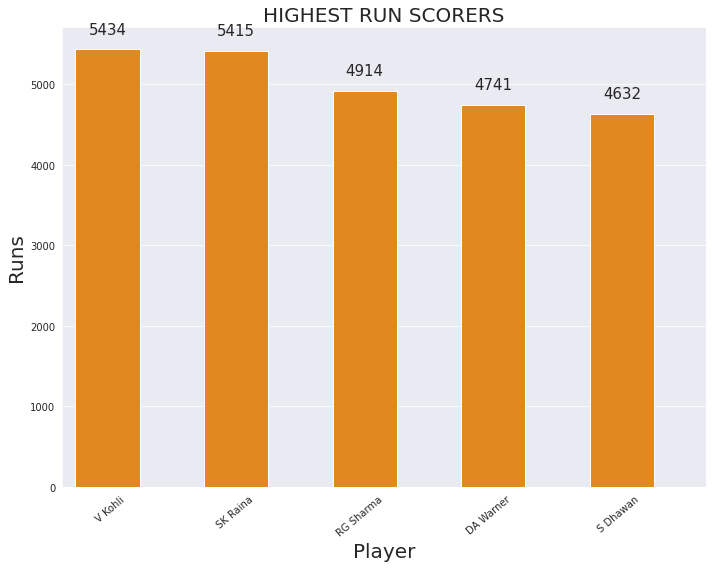

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = most_runs.head().index, y = most_runs['batsman_runs'].head(), units = most_runs.head().index, color='darkorange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Player').set_size(20)
ax.set_ylabel('Runs').set_size(20)
ax.set_title('HIGHEST RUN SCORERS').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

**Most Matches as an Umpire**

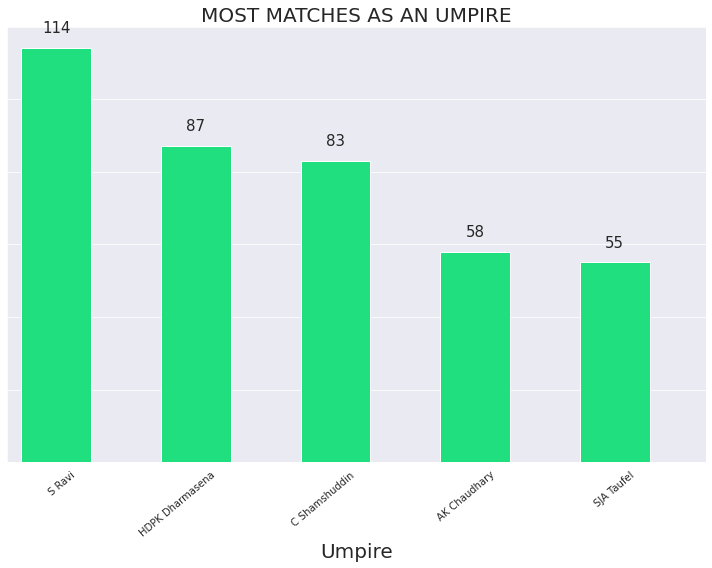

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = umpire_most_matches.head().index, y = umpire_most_matches.head().values, units = umpire_most_matches.head().index, color='springgreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Umpire').set_size(20)
ax.set_title('MOST MATCHES AS AN UMPIRE').set_size(20)
ax.set_yticklabels(())
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

**Most 'Player of the match' Winners**

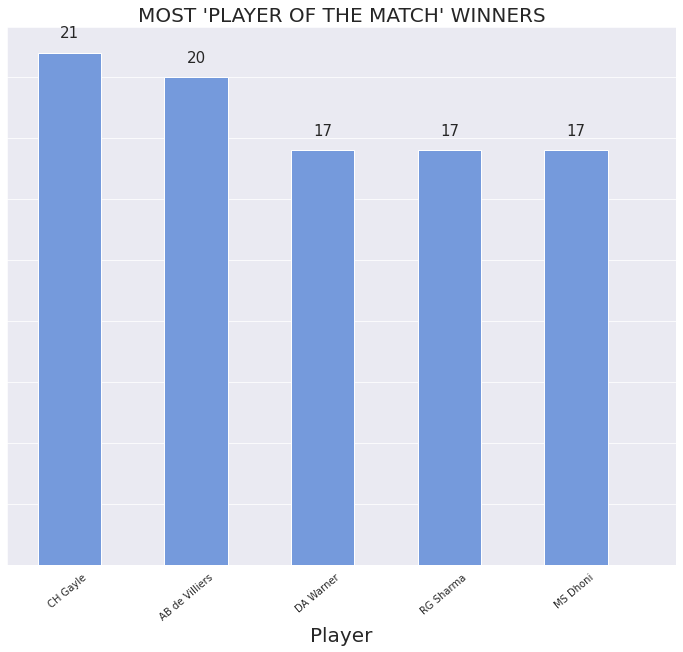

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x=most_player_of_match.head().index,y=most_player_of_match.head().values, color='cornflowerblue')
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Player').set_size(20)
ax.set_yticklabels(())
title = ax.set_title("MOST 'PLAYER OF THE MATCH' WINNERS").set_size(20)
ax.autoscale()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

**Most Wickets**

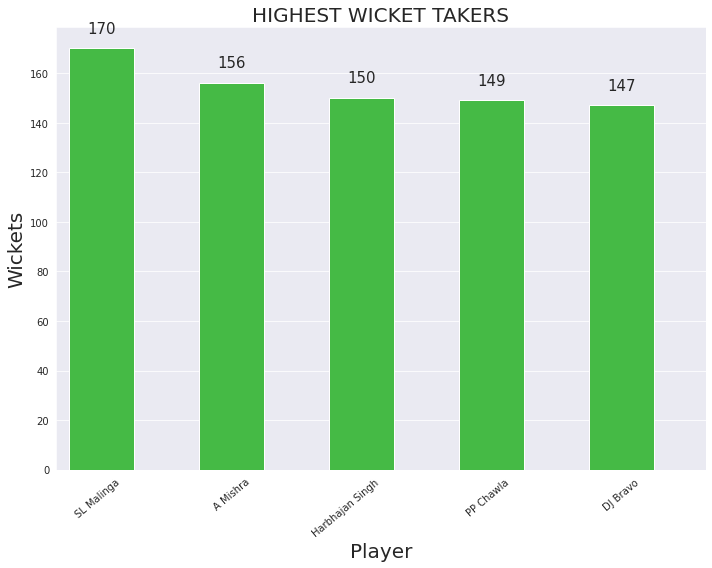

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x = most_wickets.head().index, y = most_wickets.head().values, units = most_wickets.head().index, color='limegreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Player').set_size(20)
ax.set_ylabel('Wickets').set_size(20)
ax.set_title('HIGHEST WICKET TAKERS').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)
        text = ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        
        text.set_fontsize(15)

OTHER STATS

**Advantage of Winning the Toss**

In [ ]:
probability_of_winning_if_win_toss = ((sum(matches[matches['toss_winner'] == matches['winner']]['toss_winner'].value_counts()))/(matches['id'].count()))*100
print("There is a {}% chance of the team winning the match if they win the toss.".format(probability_of_winning_if_win_toss.round(2)))

There is a 51.98% chance of the team winning the match if they win the toss.


**Matches With No Result**

In [ ]:
matches_no_result = matches[matches['result'] == 'no result']['id'].count()
print("There were {} matches with No Result.".format(matches_no_result))

There were 4 matches with No Result.


**Matches Interrupted with Result**

In [ ]:
matches_interrupted_with_result = matches[matches['dl_applied'] == 1]['dl_applied'].count()
print("There were {} matches that were interrupted but had a result.".format(matches_interrupted_with_result))

There were 19 matches that were interrupted but had a result.


**Overs with the highest wickets**

In [ ]:
overs_with_the_highest_wickets = deliveries[deliveries['player_dismissed'].notnull()]['over'].value_counts()

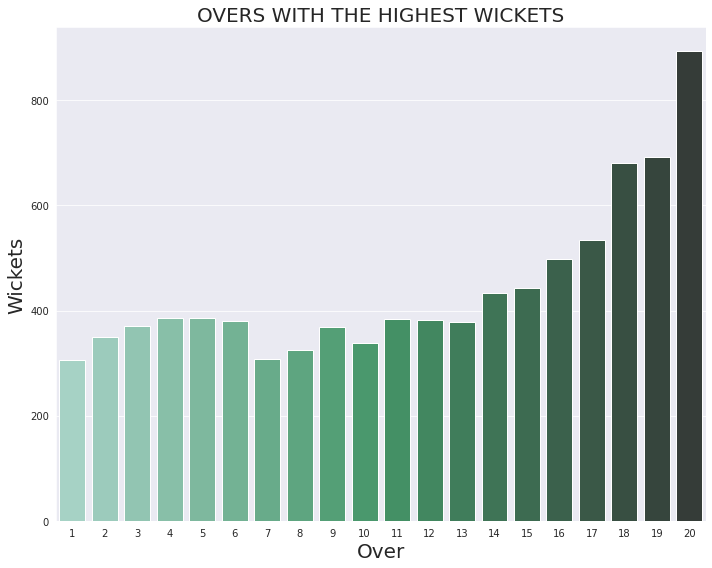

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = overs_with_the_highest_wickets.index, y = overs_with_the_highest_wickets.values,palette='BuGn_d')
ax.set_title('OVERS WITH THE HIGHEST WICKETS').set_size(20)
ax.set_xlabel('Over').set_size(20)
ax.set_ylabel('Wickets').set_size(20)
plt.tight_layout()

**Winners' Percentage**

In [ ]:
win_percent = ((most_wins/most_matches)*100).round(2)
home_win_percent = ((most_home_wins/most_matches)*100).round(2)
team_win_percentage = pd.concat([most_matches,most_wins,win_percent,most_home_wins,home_win_percent],axis=1)
team_win_percentage.columns=['Total Matches','Won','Win Percentage','Home Wins', 'Home Win Percentage']
team_win_percentage.style.apply(lambda x: ['background: lightsteelblue' for i in x])

,Total Matches,Won,Win Percentage,Home Wins,Home Win Percentage
Mumbai Indians,187,107,57.220000,57,30.480000
Royal Challengers Bangalore,180,83,46.110000,35,19.440000
Kolkata Knight Riders,178,92,51.690000,34,19.100000
Kings XI Punjab,176,80,45.450000,37,21.020000
Chennai Super Kings,164,100,60.980000,51,31.100000
Delhi Daredevils,161,67,41.610000,25,15.530000
Rajasthan Royals,147,73,49.660000,27,18.370000
Sunrisers Hyderabad,108,57,52.780000,30,27.780000
Deccan Chargers,75,29,38.670000,18,24.000000
Pune Warriors,46,12,26.090000,6,13.040000


**Win Percentage**

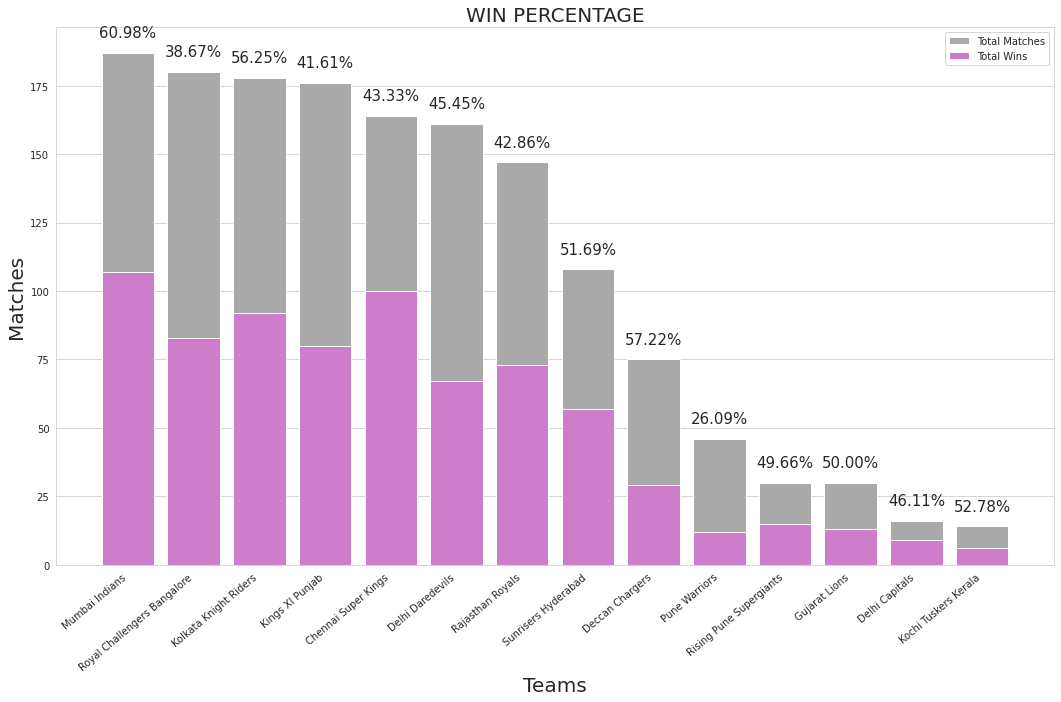

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
ax = sns.barplot(x=team_win_percentage.index,y='Total Matches',data=team_win_percentage, color='darkgrey', label="Total Matches")
plt.tight_layout()
ax = sns.barplot(x=team_win_percentage.index,y='Won',data=team_win_percentage, color='orchid', label="Total Wins")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Teams').set_size(20)
ax.set_ylabel('Matches').set_size(20)
title = ax.set_title('WIN PERCENTAGE').set_size(20)
ax.legend(loc=0)
ax.autoscale()
for val,p in zip(win_percent.values,ax.patches):
        text = ax.annotate("%.2f" % val + "%", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        text.set_fontsize(15)

**Home Win Percentage**

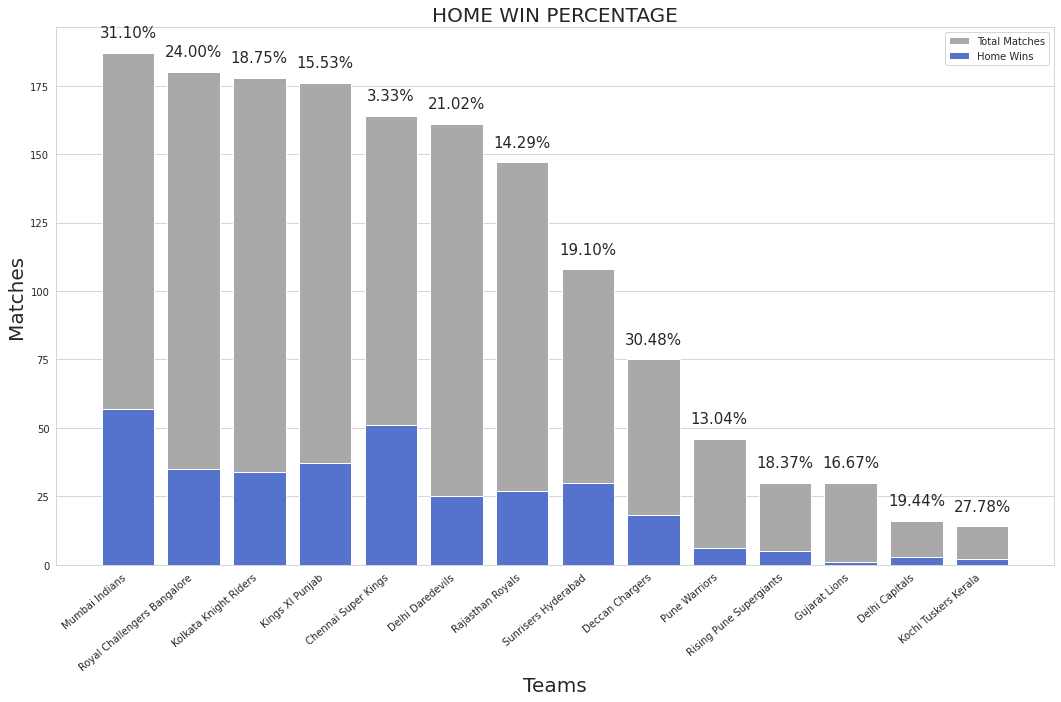

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
ax = sns.barplot(x=team_win_percentage.index,y='Total Matches',data=team_win_percentage, color='darkgrey', label="Total Matches")
plt.tight_layout()
ax = sns.barplot(x=team_win_percentage.index,y='Home Wins',data=team_win_percentage, color='royalblue', label="Home Wins")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Teams').set_size(20)
ax.set_ylabel('Matches').set_size(20)
title = ax.set_title('HOME WIN PERCENTAGE').set_size(20)
ax.legend(loc=0)
ax.autoscale()
for val,p in zip(home_win_percent.values,ax.patches):
        text = ax.annotate("%.2f" % val + "%", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
        text.set_fontsize(15)

**Average Runs in Each Over**

In [ ]:
overs, number = np.unique(np.concatenate(deliveries.groupby(['match_id','inning'])['over'].unique().values), return_counts=True)
average_runs_in_each_over = ((deliveries.groupby(['over'])['total_runs'].sum())/(number)).round(2)

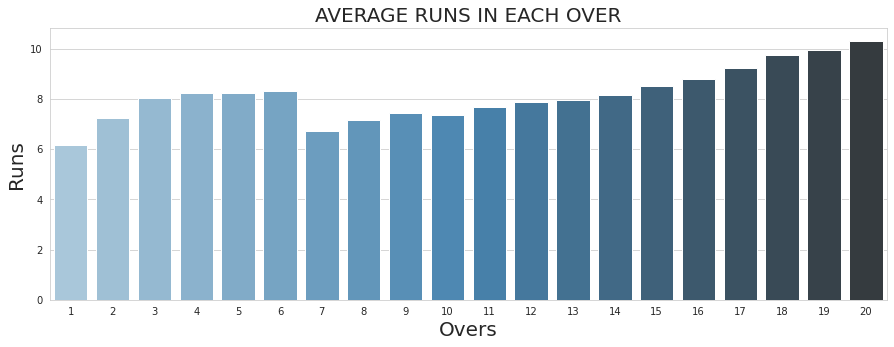

In [ ]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax = sns.barplot(x=average_runs_in_each_over.index,y=average_runs_in_each_over.values,palette='Blues_d')
ax.set_xlabel("Overs").set_size(20)
ax.set_ylabel("Runs").set_size(20)
ax.set_title("AVERAGE RUNS IN EACH OVER").set_size(20)

**Finalists**

In [ ]:
finalists = matches[matches['id'].apply(lambda id: id in matches.groupby('season')['id'].max().values)].sort_values(by=['season'])[['season','city','date','team1','team2','toss_winner','toss_decision','player_of_match', 'winner']]
finalists.style.apply(lambda x: ['background: royalblue' if x.name == 'winner' else 'background: lightsteelblue' for i in x])

,season,city,date,team1,team2,toss_winner,toss_decision,player_of_match,winner
116,2008,Mumbai,2008-01-06 00:00:00,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,YK Pathan,Rajasthan Royals
173,2009,Johannesburg,2009-05-24 00:00:00,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,A Kumble,Deccan Chargers
233,2010,Mumbai,2010-04-25 00:00:00,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,SK Raina,Chennai Super Kings
306,2011,Chennai,2011-05-28 00:00:00,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,M Vijay,Chennai Super Kings
380,2012,Chennai,2012-05-27 00:00:00,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,MS Bisla,Kolkata Knight Riders
456,2013,Kolkata,2013-05-26 00:00:00,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,KA Pollard,Mumbai Indians
516,2014,Bangalore,2014-01-06 00:00:00,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,MK Pandey,Kolkata Knight Riders
575,2015,Kolkata,2015-05-24 00:00:00,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,RG Sharma,Mumbai Indians
635,2016,Bangalore,2016-05-29 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,BCJ Cutting,Sunrisers Hyderabad
58,2017,Hyderabad,2017-05-21 00:00:00,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,KH Pandya,Mumbai Indians
